In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model, \
add_sentiment_features_from_articles, add_sentiments_from_reddit
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss

In [4]:
np.random.seed(120)
random.seed(120)

In [5]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [6]:
X, y = prepare_market_data_for_model("eth_merged.csv", base_path, horizon=12*12)

In [7]:
texts = pd.read_csv("/content/drive/My Drive/magisterka/data/results/articles_labeled.csv")
comments = pd.read_csv("/content/drive/My Drive/magisterka/data/results/comments_labeled_non_finetuned.csv")

In [8]:
X = add_sentiment_features_from_articles(X, texts, windows_hours=(2, 6, 12, 24))

In [9]:
X = add_sentiments_from_reddit(X, comments, windows_hours=(2, 6, 12, 24))

In [10]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.8231 - val_loss: 0.8743 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6445 - val_loss: 0.8620 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6027 - val_loss: 0.8617 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5942 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5746 - val_loss: 0.8814 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5655 - val_loss: 0.8759 - learning_rate: 5.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5516 - val_loss: 0.8774 - learning_rate: 5.0000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5397 - val_loss: 0.8821 - learning_rate: 2.5000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5222 - val_loss: 0.8905 - learning_rate: 2.500

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


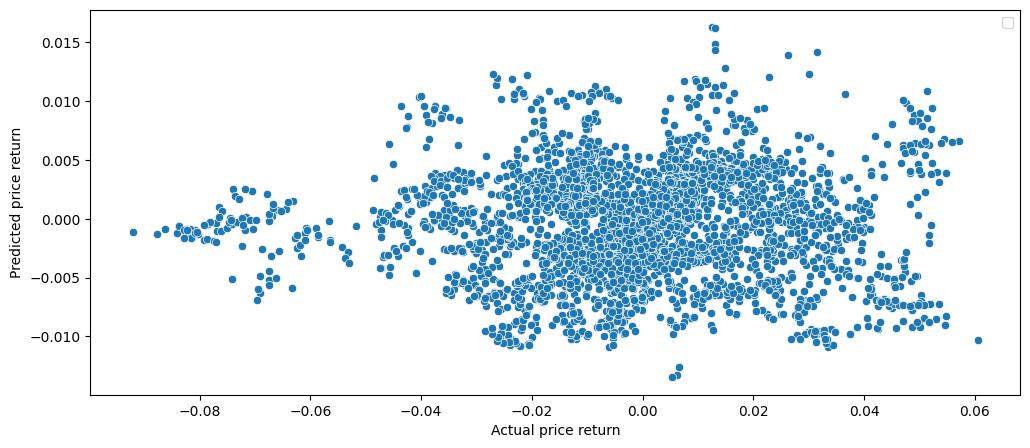

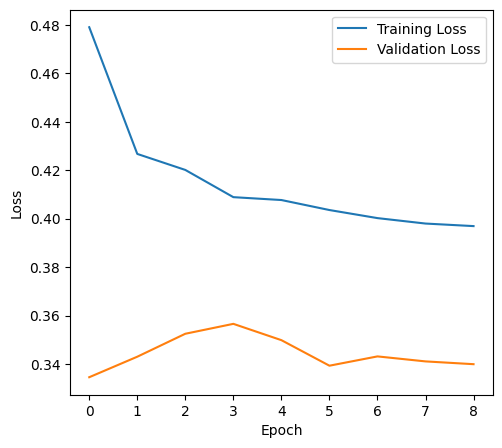

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008821341907605529
mean CV MAE: 0.02090688981115818
mean CV DA: 0.5707789066279633
mean CV SR: 0.15139030996327682
mean CV R^2: -0.1313481330871582
mean CV Pearson correlation: 0.105290487408638


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


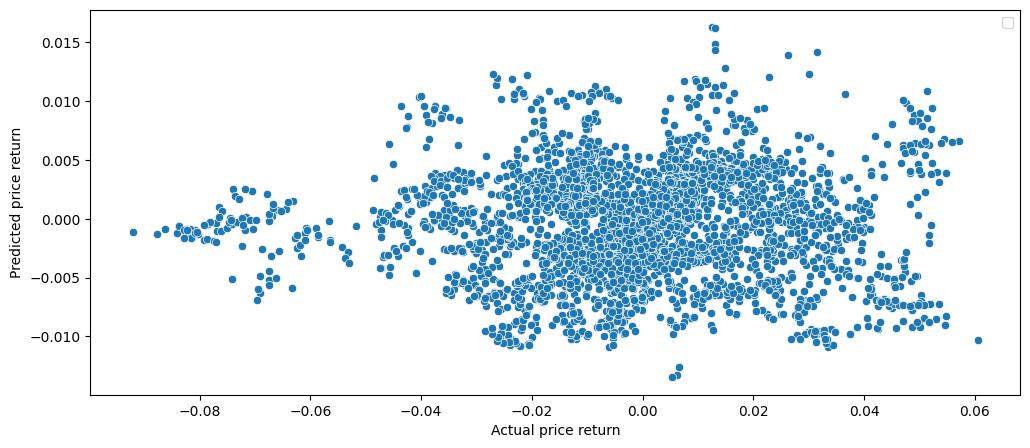

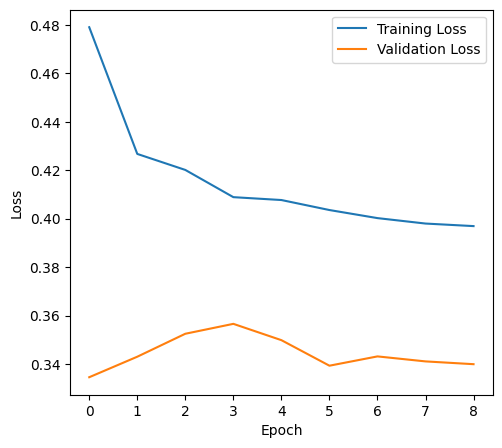

successfully saved training's output to lstm_eth_scores_final_comments_1.json


In [ ]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_comments_1.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.8121 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5855 - val_loss: 0.8690 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5691 - val_loss: 0.8866 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5777 - val_loss: 0.8878 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4952 - val_loss: 0.8746 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5073 - val_loss: 0.9141 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4797 - val_loss: 0.9059 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4625 - val_loss: 0.9041 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4626 - val_loss: 0.9077 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


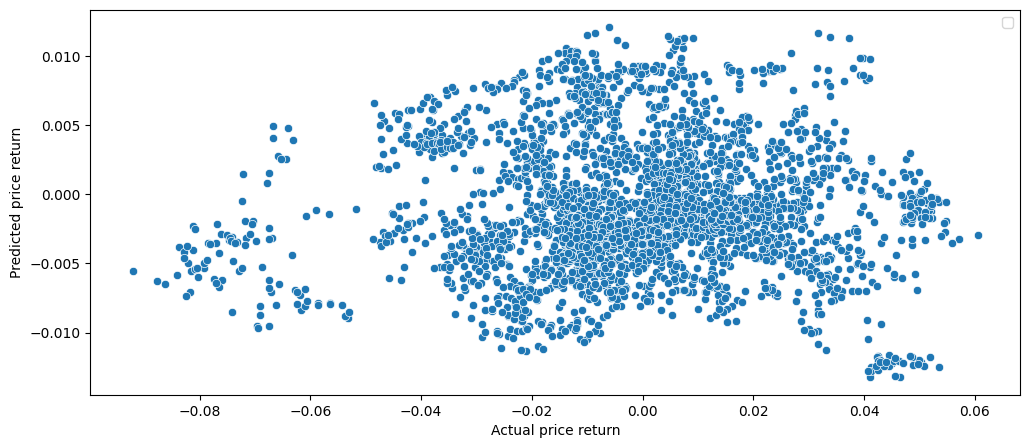

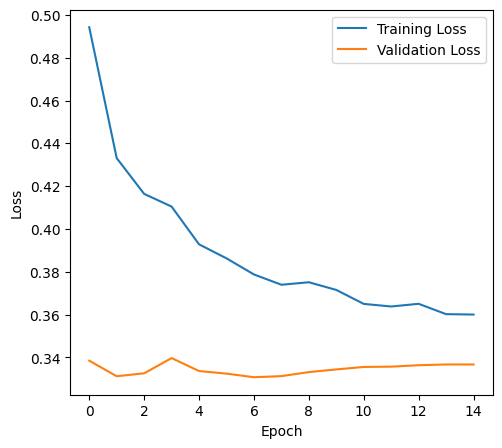

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00091522530419752
mean CV MAE: 0.021444890648126602
mean CV DA: 0.5587808417997098
mean CV SR: 0.08304301050825384
mean CV R^2: -0.14759809970855714
mean CV Pearson correlation: 0.0590469129383564


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


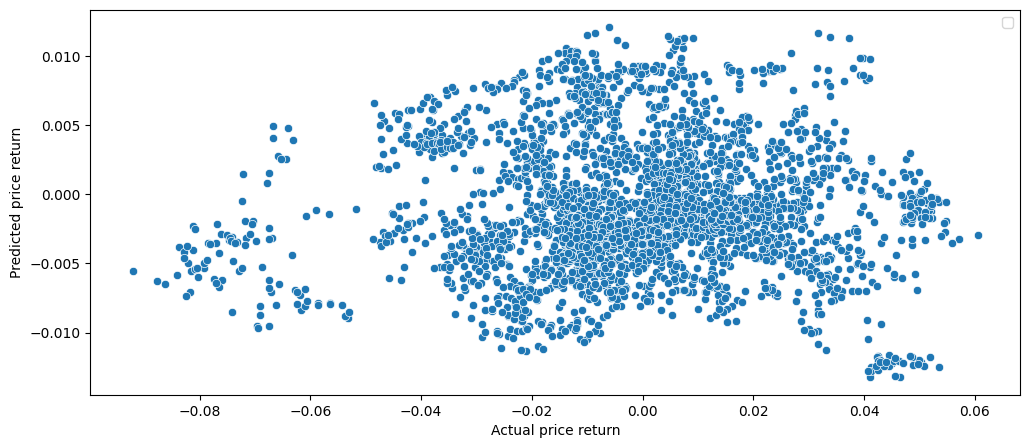

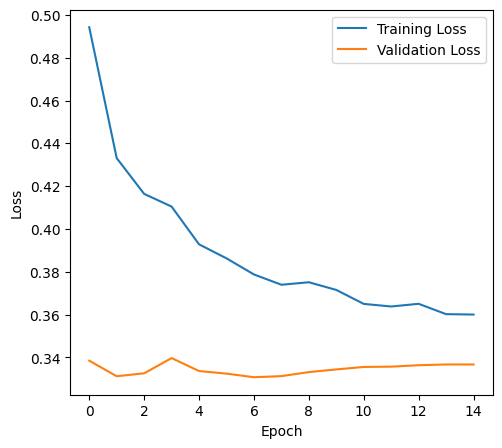

successfully saved training's output to lstm_eth_scores_final_comments_2.json


In [ ]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_comments_2.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.9360 - val_loss: 0.9444 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7708 - val_loss: 0.8906 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6682 - val_loss: 0.8990 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6463 - val_loss: 0.8949 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6146 - val_loss: 0.9229 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.5791 - val_loss: 0.9034 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5560 - val_loss: 0.9190 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5472 - val_loss: 0.9262 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5398 - val_loss: 0.9280 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


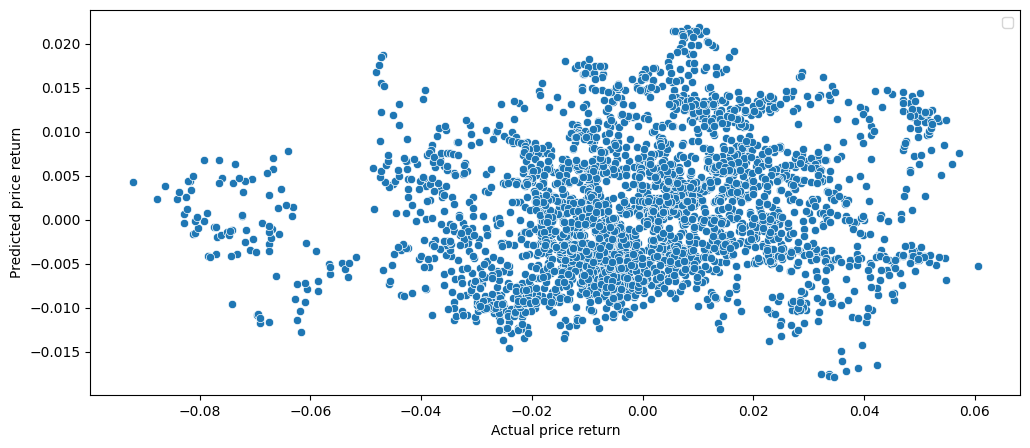

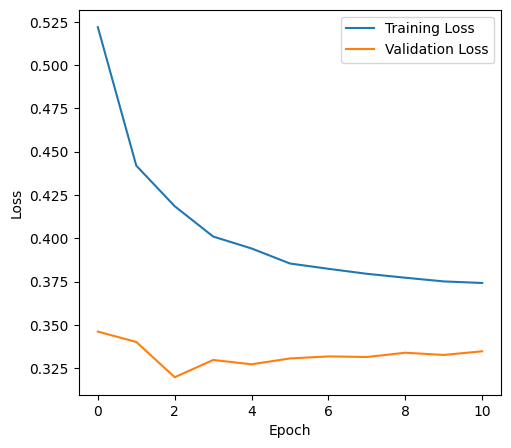

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009474040707573295
mean CV MAE: 0.02190733328461647
mean CV DA: 0.5080793420416062
mean CV SR: -0.006202781182130953
mean CV R^2: -0.1938868761062622
mean CV Pearson correlation: -0.09494229406118393


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


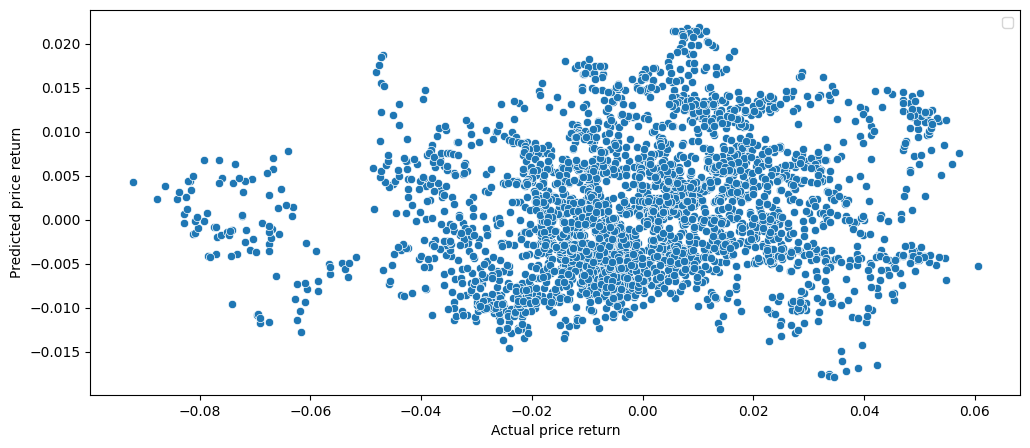

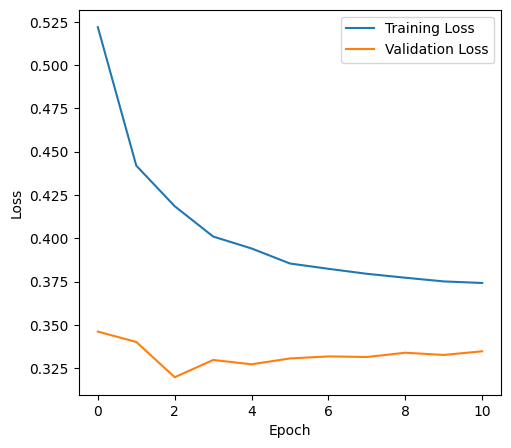

successfully saved training's output to lstm_eth_scores_final_comments_3.json


In [ ]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_comments_3.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.8431 - val_loss: 0.8421 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7305 - val_loss: 0.8133 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7343 - val_loss: 0.8467 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7023 - val_loss: 0.8312 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6958 - val_loss: 0.8296 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6896 - val_loss: 0.8644 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6741 - val_loss: 0.8702 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6712 - val_loss: 0.8796 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6733 - val_loss: 0.8770 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


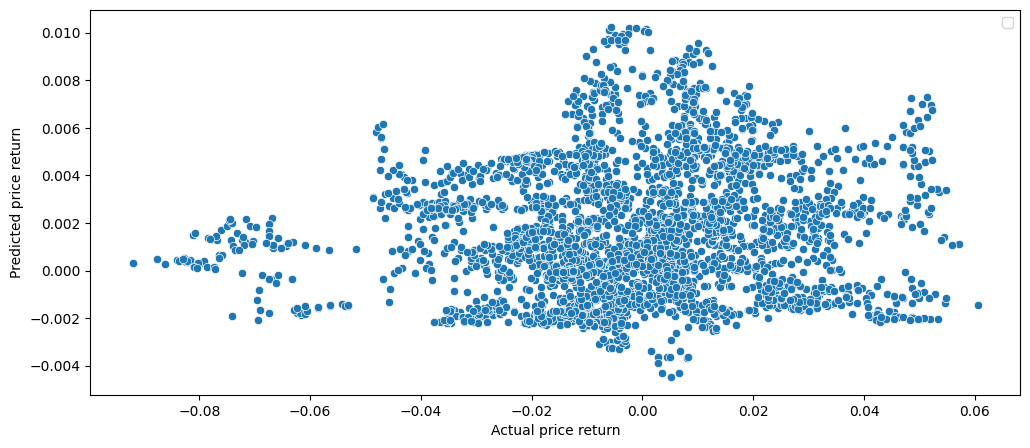

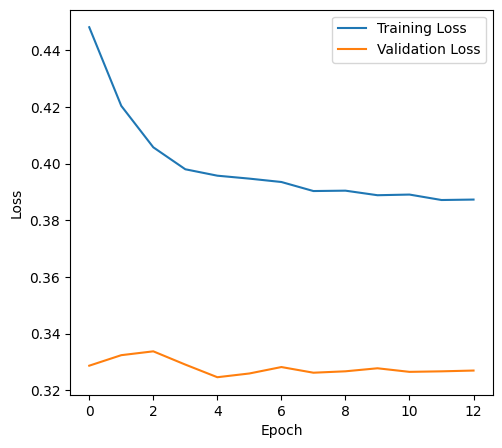

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008949363837018609
mean CV MAE: 0.02109331078827381
mean CV DA: 0.542718916303822
mean CV SR: 0.05250335745161301
mean CV R^2: -0.10841753482818603
mean CV Pearson correlation: 0.00044376254663802683


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


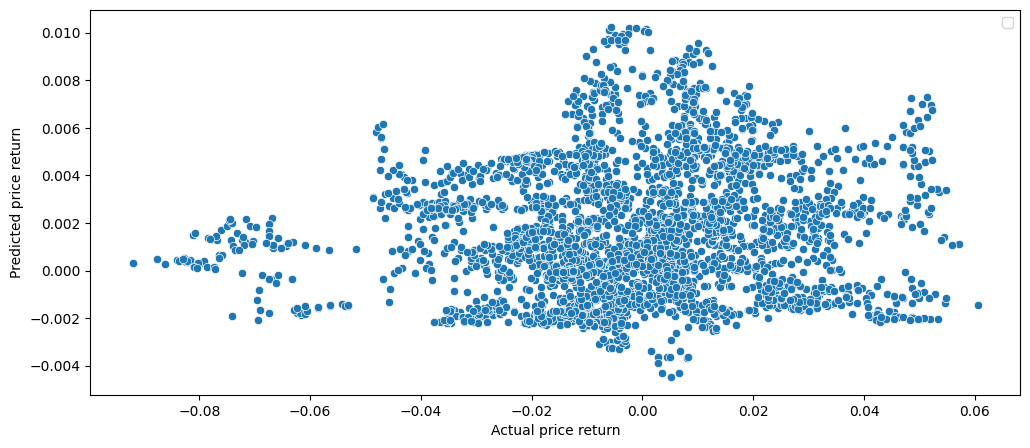

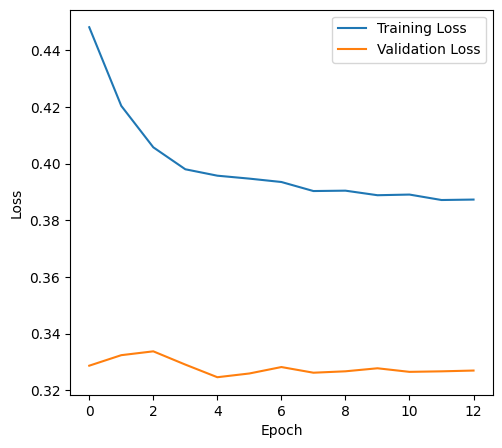

successfully saved training's output to lstm_eth_scores_final_comments_4.json


In [ ]:
lstm_4_scores, lstm_4_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_comments_4.json", dropout=0.7, num_neurons=24, num_layers=2, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8329 - val_loss: 0.8662 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6875 - val_loss: 0.8617 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6559 - val_loss: 0.8685 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6490 - val_loss: 0.8804 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6091 - val_loss: 0.8822 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5762 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5698 - val_loss: 0.8990 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5561 - val_loss: 0.8969 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5467 - val_loss: 0.8957 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


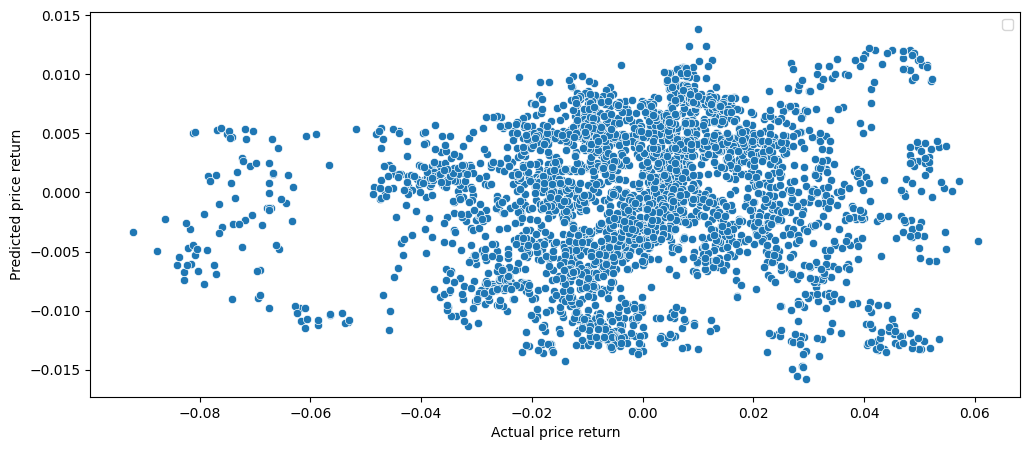

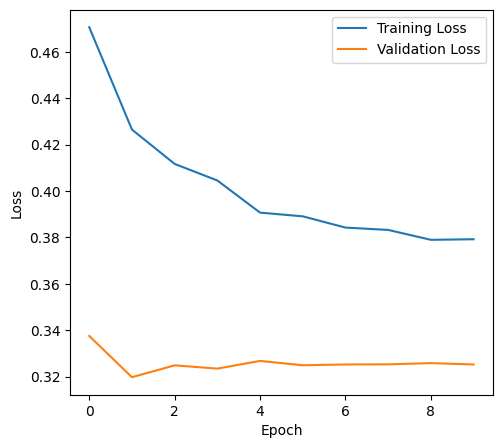

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009214942110702395
mean CV MAE: 0.02146691456437111
mean CV DA: 0.5231736816642478
mean CV SR: 0.012771938742843927
mean CV R^2: -0.13992189168930053
mean CV Pearson correlation: -0.004619902465492487


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


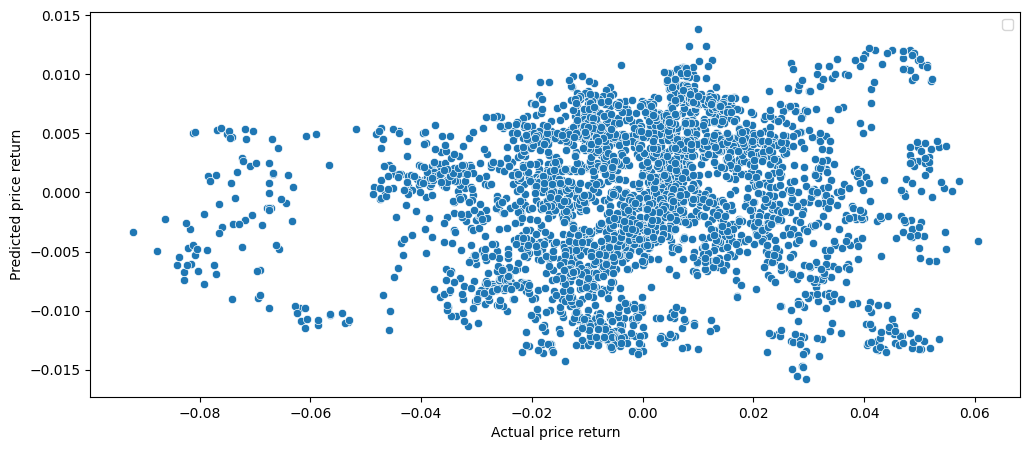

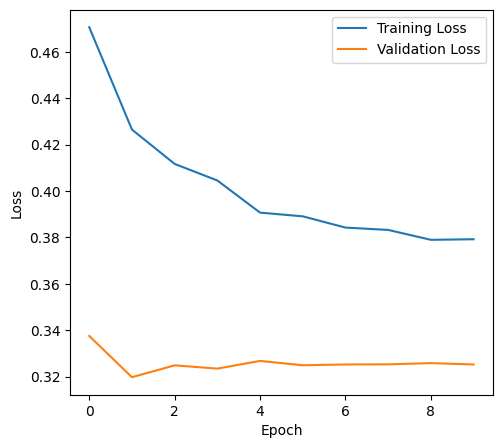

successfully saved training's output to lstm_eth_scores_final_comments_5.json


In [ ]:
lstm_5_scores, lstm_5_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_final_comments_5.json", dropout=0.7, num_neurons=24, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.8062 - val_loss: 0.8538 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7132 - val_loss: 0.8814 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7011 - val_loss: 0.8673 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6872 - val_loss: 0.8819 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6926 - val_loss: 0.8947 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6605 - val_loss: 0.9085 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6646 - val_loss: 0.9181 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6685 - val_loss: 0.9162 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6570 - val_loss: 0.9168 - learning_rat

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


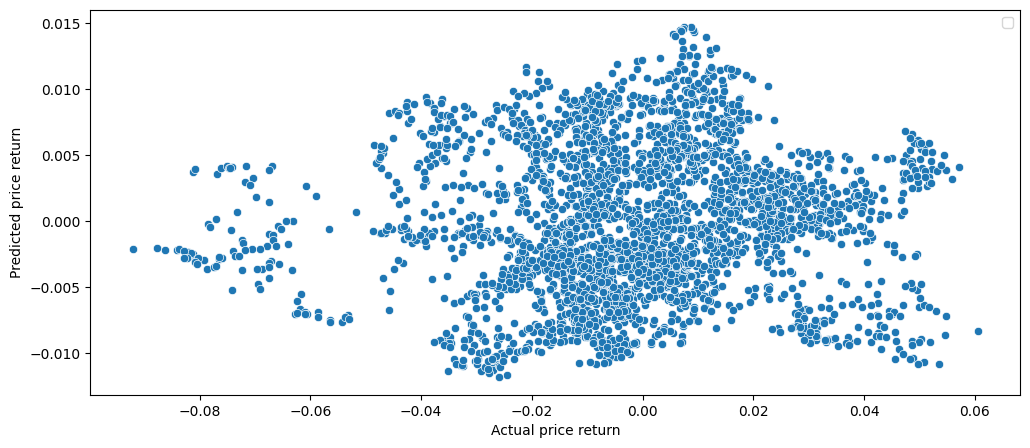

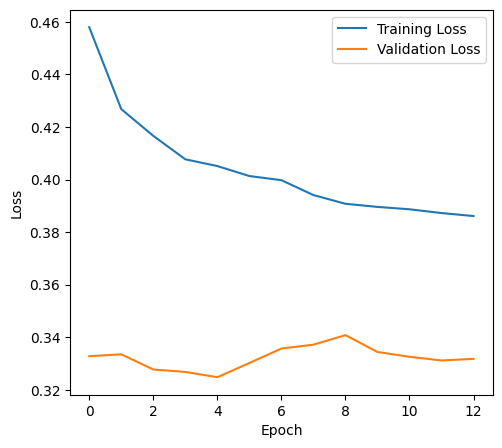

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009009099449031055
mean CV MAE: 0.02135574072599411
mean CV DA: 0.5252056119980648
mean CV SR: 0.053610750969718166
mean CV R^2: -0.1251639485359192
mean CV Pearson correlation: 0.03229878097772598


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


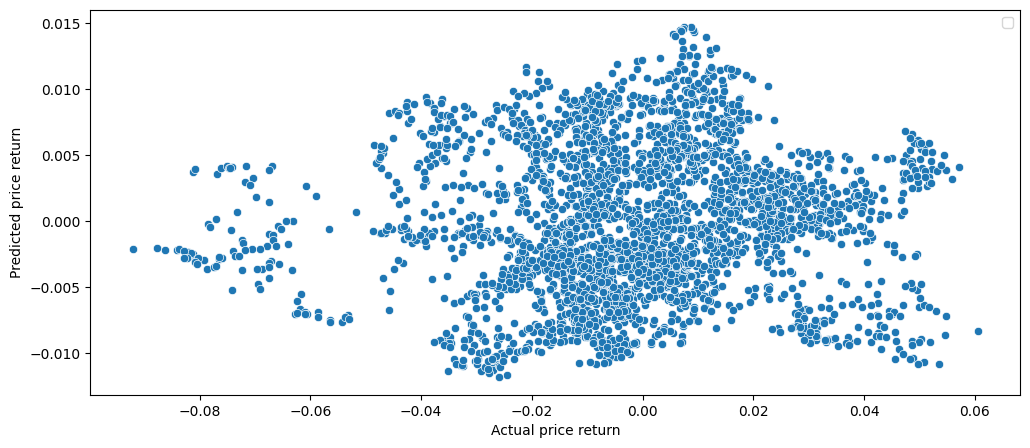

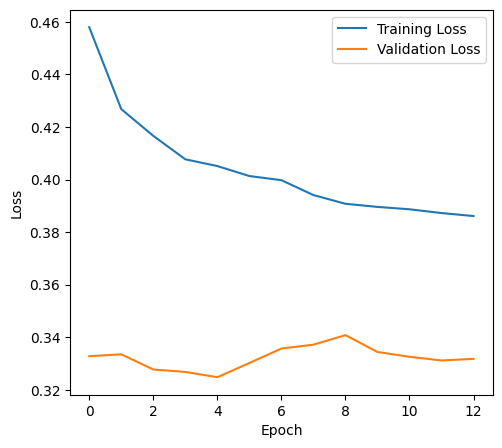

successfully saved training's output to gru_eth_scores_1_final_comments.json


In [ ]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_1_final_comments.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.8550 - val_loss: 0.8733 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6636 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6302 - val_loss: 0.8823 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6395 - val_loss: 0.8961 - learning_rate: 5.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6234 - val_loss: 0.8958 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5920 - val_loss: 0.9070 - learning_rate: 2.5000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5870 - val_loss: 0.9051 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5816 - val_loss: 0.9054 - learning_rate: 1.2500e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5831 - val_loss: 0.9060 - learning_rat

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_30
Received: inputs=['Tensor(shape=(500, 64, 30))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_30
Received: inputs=['Tensor(shape=(50, 64, 30))']
  warnings.warn(msg)
/content/drive/My Drive/magisterka/model_training/price_model_training.py:414: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


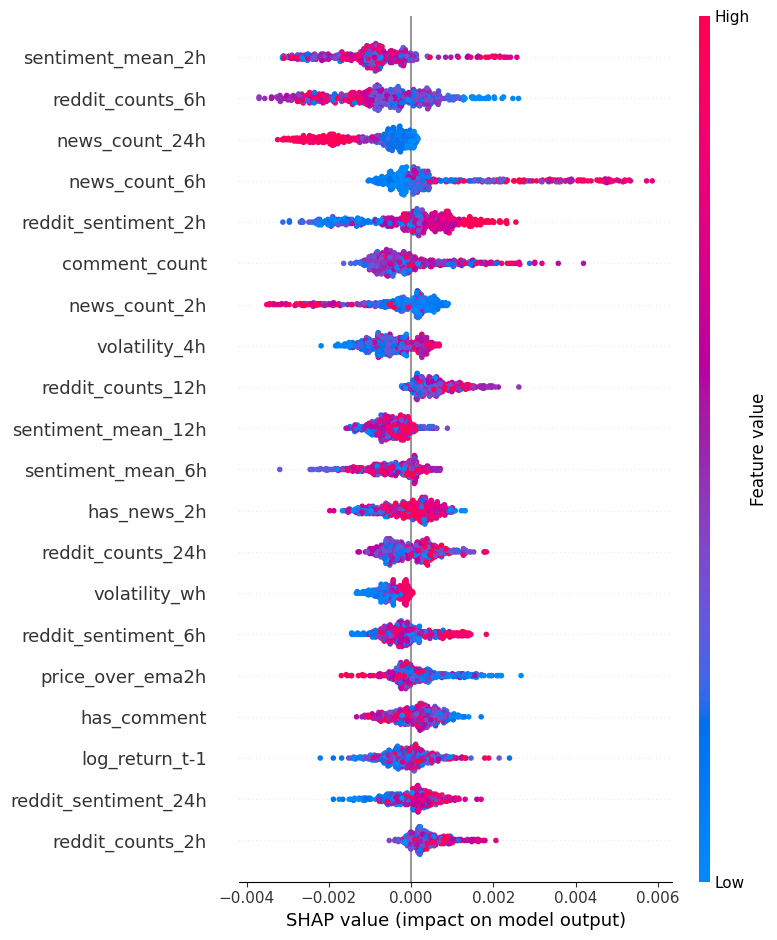

[FINAL TEST] mse: 0.000550599 | mae: 0.0174657 | da: 0.576 | sr: 0.144 | r_squared: 0.018 | corr: 0.158


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


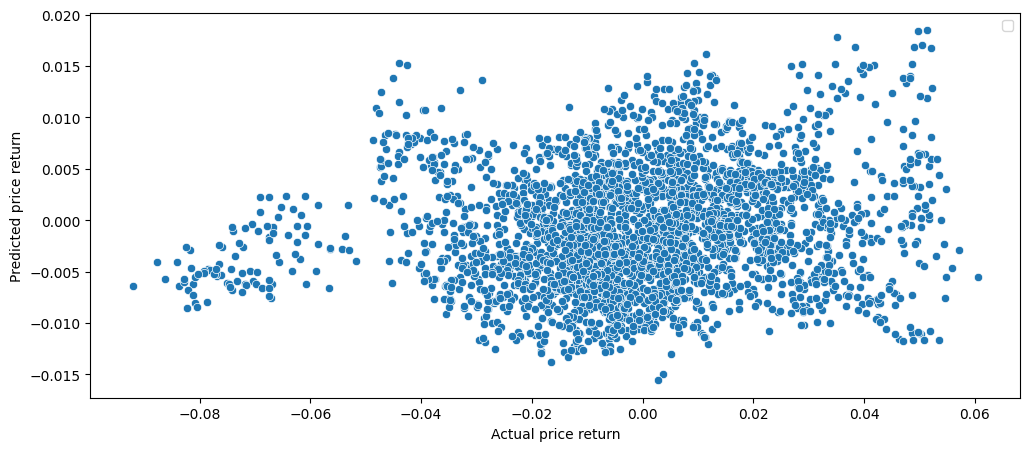

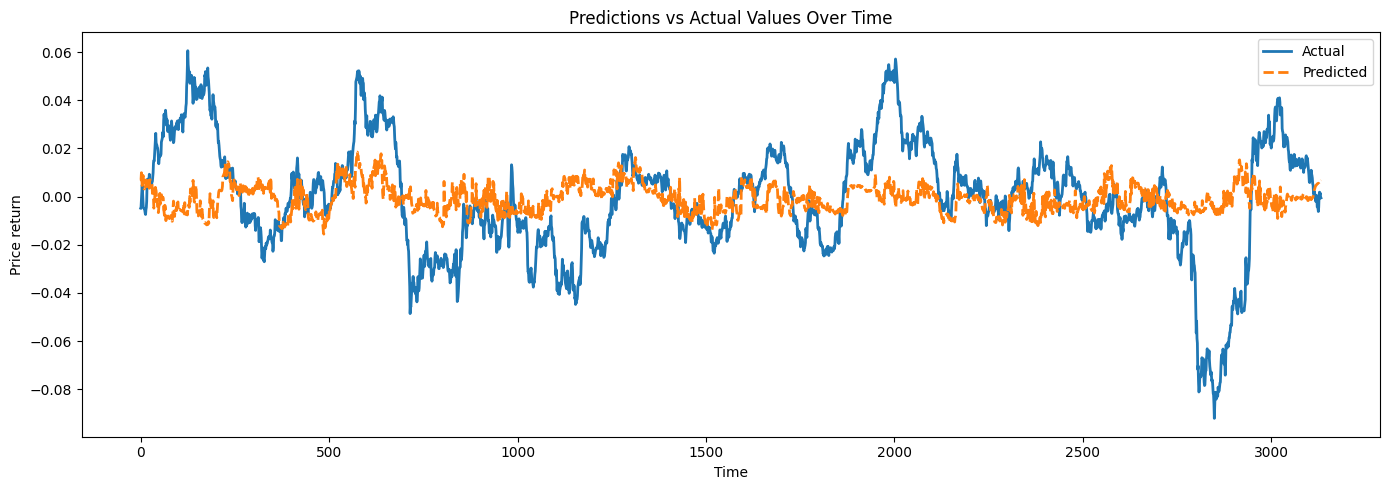

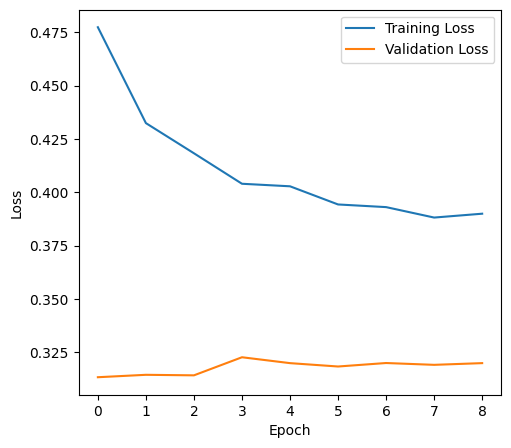

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0008852180326357484
mean CV MAE: 0.021180618554353714
mean CV DA: 0.5569424286405418
mean CV SR: 0.11149349017235666
mean CV R^2: -0.1154353141784668
mean CV Pearson correlation: 0.04955310747027397


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


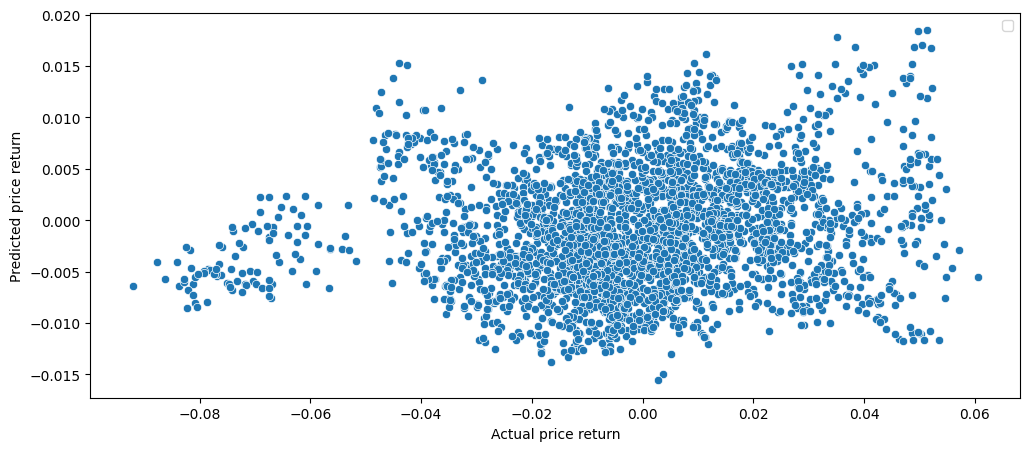

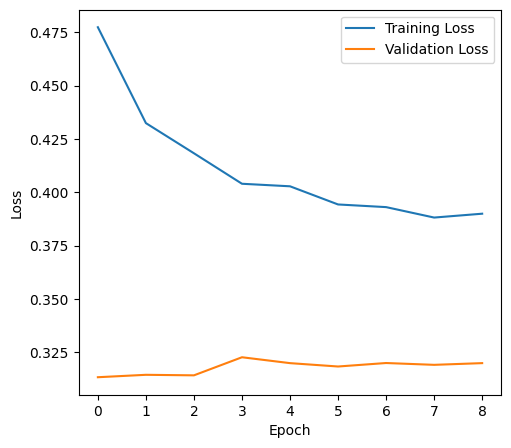

successfully saved training's output to gru_eth_scores_final_comments_2.json


In [11]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_comments_2.json", dropout=0.7, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER, plot_shap_values=True)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0917 - val_loss: 1.1526 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6625 - val_loss: 0.9467 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5847 - val_loss: 0.8935 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5782 - val_loss: 0.9925 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5132 - val_loss: 0.9167 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5397 - val_loss: 0.9393 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.4104 - val_loss: 0.9015 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4337 - val_loss: 0.9371 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3529 - val_loss: 0.9409 - learning_rate: 5.0000e-04
Ep

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


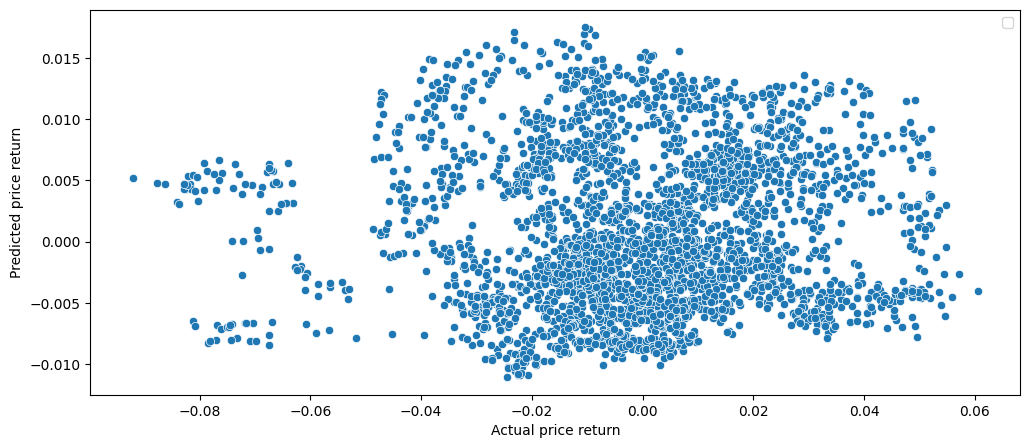

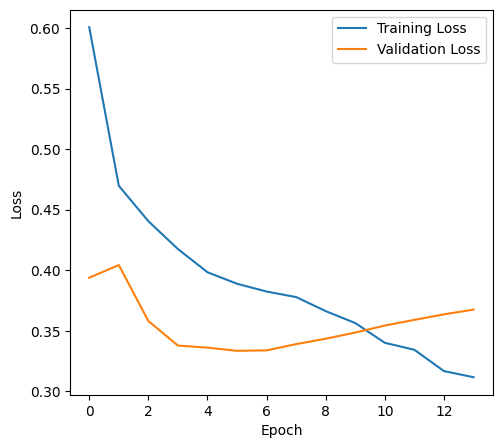

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000919520971365273
mean CV MAE: 0.02210267260670662
mean CV DA: 0.5164973391388485
mean CV SR: 0.06492590435841412
mean CV R^2: -0.1827301263809204
mean CV Pearson correlation: 0.02020617201924324


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


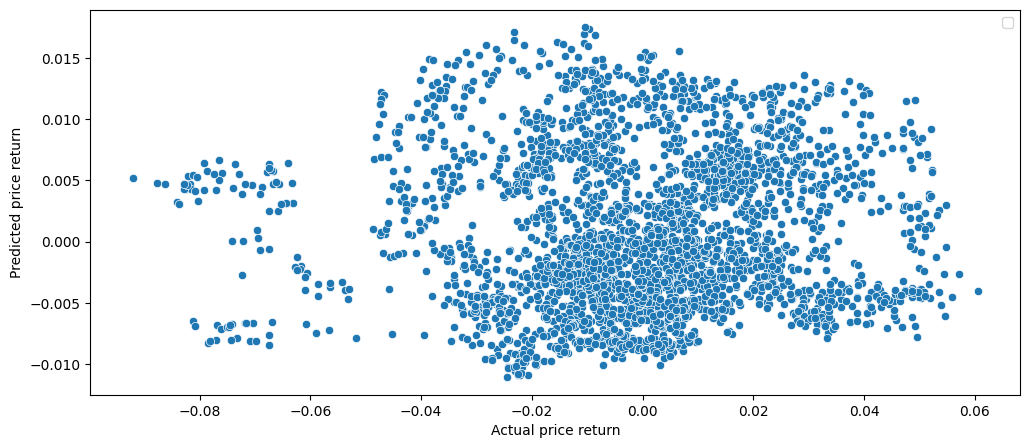

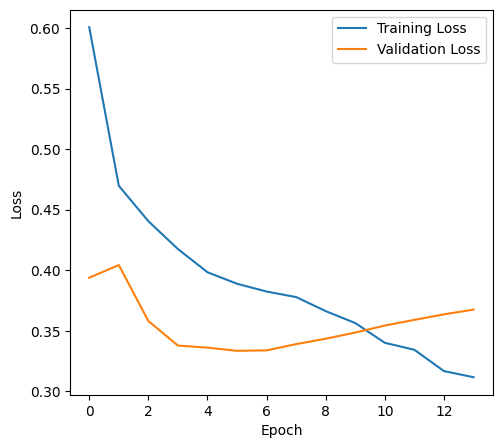

successfully saved training's output to gru_eth_scores_final_comments_3.json


In [ ]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_comments_3.json", dropout=0.2, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0239 - val_loss: 0.9213 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6613 - val_loss: 0.9438 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7277 - val_loss: 0.9147 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5534 - val_loss: 0.8852 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6376 - val_loss: 1.0995 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5037 - val_loss: 0.8403 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4960 - val_loss: 0.9866 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4777 - val_loss: 0.8768 - learning_rate: 0.0020
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5088 - val_loss: 0.8989 - learning_rate: 0.0010
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


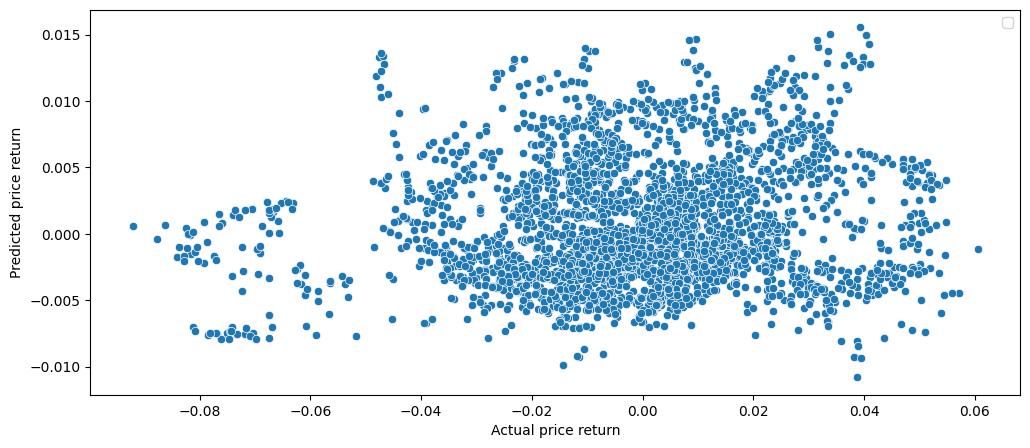

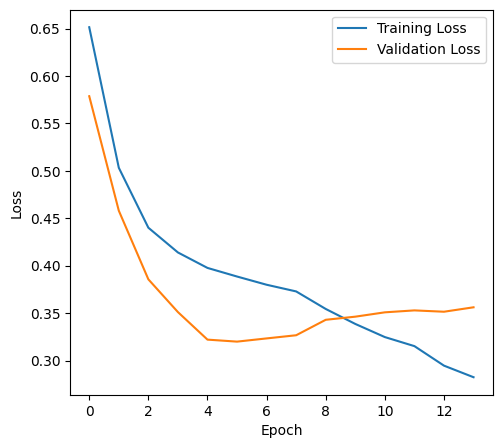

=== Cross-validation (validation folds) ===
mean CV MSE: 0.0009227949194610119
mean CV MAE: 0.021728351712226868
mean CV DA: 0.5222060957910014
mean CV SR: 0.0660490209628491
mean CV R^2: -0.16884205341339112
mean CV Pearson correlation: 0.025299349799752235


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


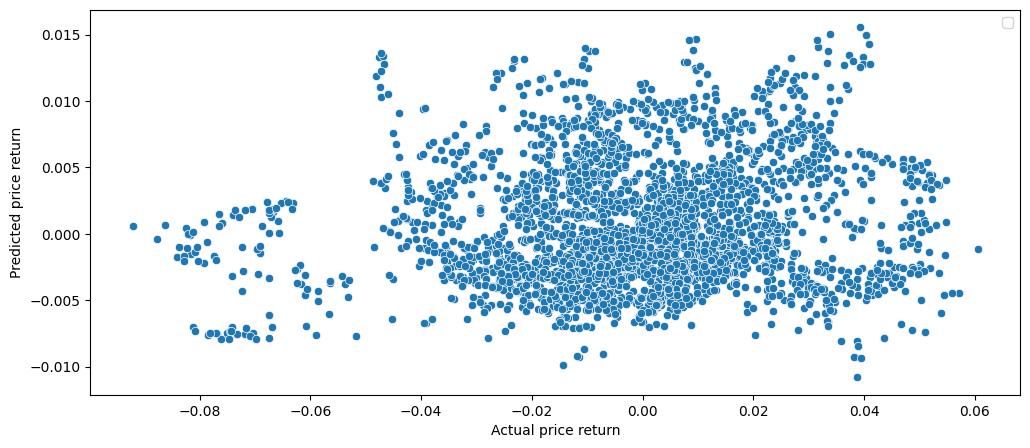

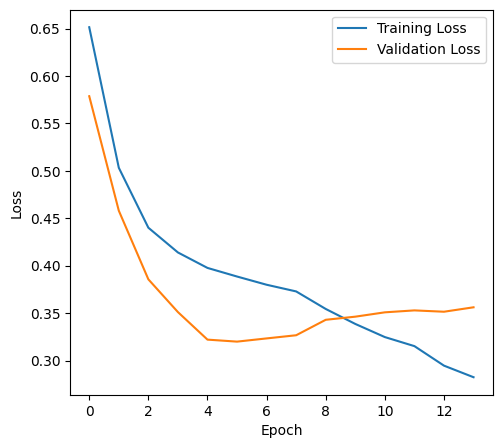

successfully saved training's output to gru_eth_scores_final_comments_4.json


In [ ]:
gru_4_scores, gru_4_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_final_comments_4.json", dropout=0.2, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

In [ ]:
def adf_test(series):
    result = adfuller(series, autolag="AIC")
    return {
        "ADF statistic": result[0],
        "p-value": result[1],
        "used lags": result[2],
        "nobs": result[3]
    }
def kpss_test(series, regression="c"):
    statistic, p_value, n_lags, _ = kpss(series, regression=regression, nlags="auto")
    return {
        "KPSS statistic": statistic,
        "p-value": p_value,
        "used lags": n_lags
    }

In [ ]:
adf_test(y)

{'ADF statistic': np.float64(-7.417757975481922),
 'p-value': np.float64(6.863464604419514e-11),
 'used lags': 17,
 'nobs': 15965}

In [ ]:
kpss_test(y)

{'KPSS statistic': np.float64(0.3535348445786511),
 'p-value': np.float64(0.09718325664713315),
 'used lags': 75}

In [ ]:
d = 0

In [ ]:
def select_pq(y, d, p_max=5, q_max=5):
    best = {"aic": np.inf, "order": None, "result": None}
    for p in range(p_max + 1):
        for q in range(q_max + 1):
            try:
                res = SARIMAX(
                    y, order=(p, d, q),
                    enforce_stationarity=False,
                    enforce_invertibility=False
                ).fit(disp=False)
                if res.aic < best["aic"]:
                    best = {"aic": res.aic, "order": (p, d, q), "result": res}
            except Exception:
                pass
    return best["order"], best["aic"]

order, aic = select_pq(y, d=0, p_max=5, q_max=5)
order, aic

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self.

((2, 0, 1), np.float64(-144420.1137833237))

In [ ]:
y_acf = y[::12*12]

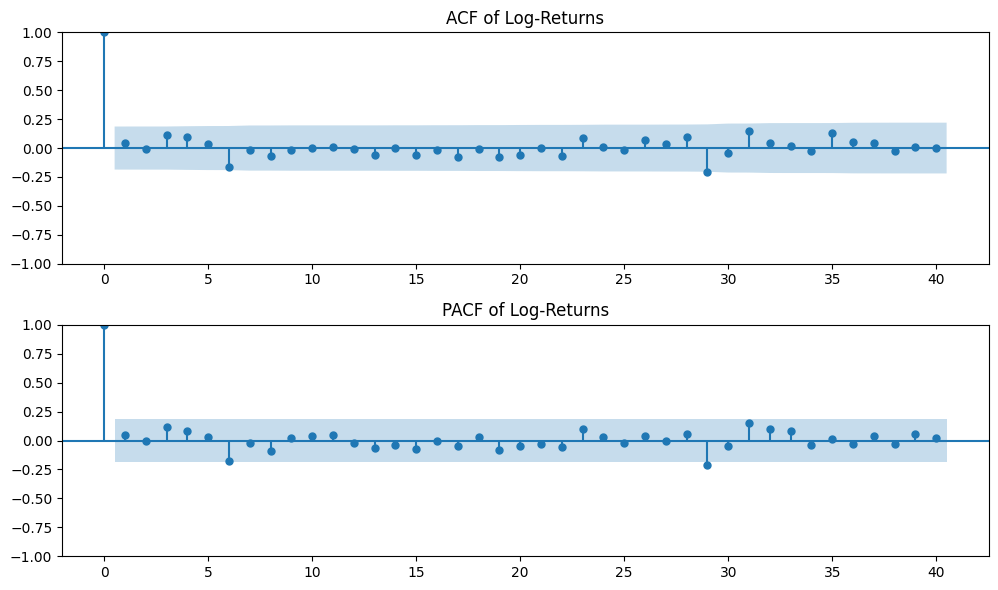

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(y_acf, lags=40, ax=ax[0])
ax[0].set_title("ACF of Log-Returns")

plot_pacf(y_acf, lags=40, ax=ax[1])
ax[1].set_title("PACF of Log-Returns")

plt.tight_layout()
plt.show()


In [ ]:
X1 = X[::12*12]

In [ ]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_eth_scores_1_final_comments.json", epochs=100, order=(0, 0, 0))

ValueError: Cannot have number of folds=6 greater than the number of samples=0.